In [1]:
import pandas as pd
from matplotlib.animation import FuncAnimation
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature

In [2]:
ASOS_Locations = pd.read_csv(r'/Users/jerem/OneDrive/Desktop/SAVEUR/SAVEUR Internship/Data/Urban_Heat_Island/ASOS_Locations.csv')

In [3]:
lat, lon = ASOS_Locations['LATITUDE'], ASOS_Locations['LONGITUDE']

Locations = ASOS_Locations['CALL_SIGN']


In [4]:
Boundary = [43.069,-90.822,40.611,-87.302]

In [7]:
shapefile = '/Users/jerem/OneDrive/Desktop/SAVEUR/SAVEUR Internship/Data/Urban_Heat_Island/Boundaries_City/geo_export_eb3e4dfa-d26a-4ead-aeb2-65290ffa2039.shp'
cat_shp = shpreader.Reader(shapefile)

#Lincoln Institute of Land Policy - Earthworks
shapefile = '/Users/jerem/OneDrive/Desktop/SAVEUR/SAVEUR Internship/Data/Urban_Heat_Island/Metro_Area1/rj676cg9479.shp'
Metro_Area = shpreader.Reader(shapefile)

shapefile = '/Users/jerem/OneDrive/Desktop/SAVEUR/SAVEUR Internship/Data/Urban_Heat_Island/s_11au16/s_11au16.shp'
US_States = shpreader.Reader(shapefile)

shapefile = '/Users/jerem/OneDrive/Desktop/SAVEUR/SAVEUR Internship/Data/Urban_Heat_Island/hydro_p_LakeMichigan/hydro_p_LakeMichigan.shp'
Lake_Michigan = shpreader.Reader(shapefile)

C:\Users\jerem\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


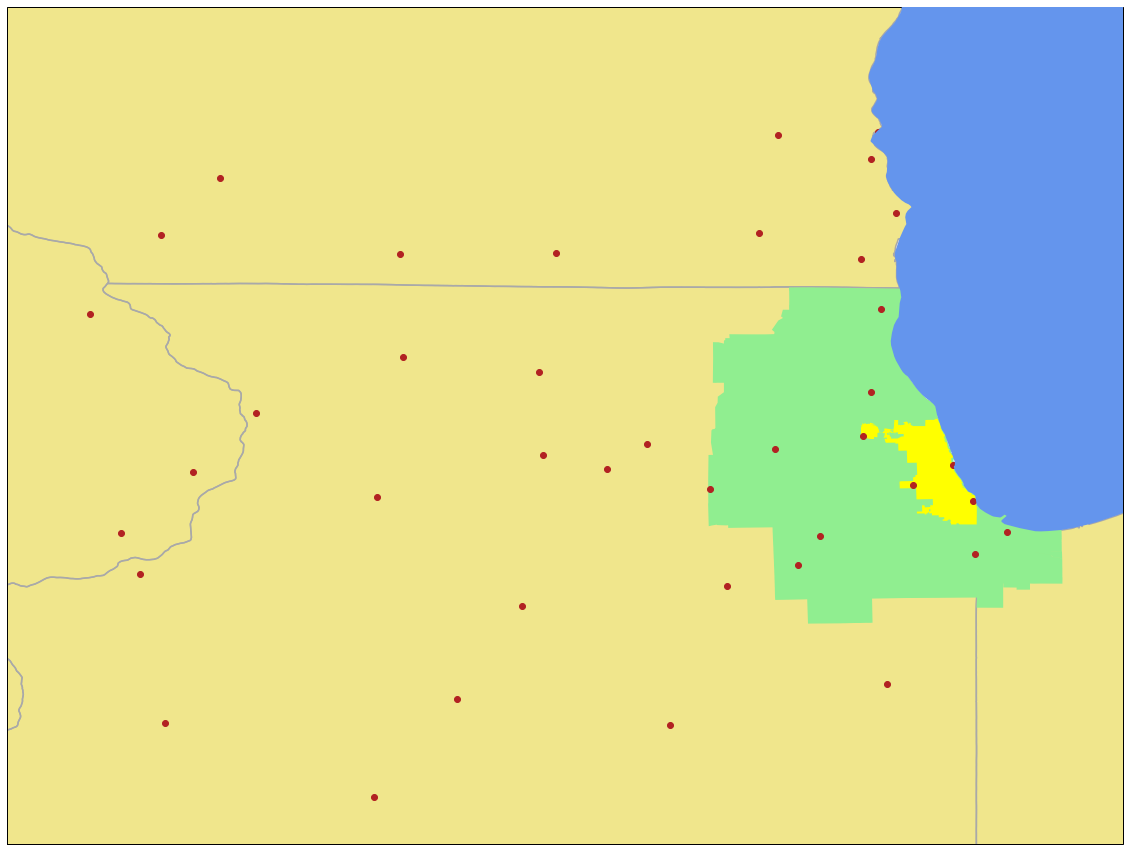

In [41]:

fig = plt.figure(figsize=(20, 16))
ax = plt.axes(projection=ccrs.PlateCarree())

#Boundary
xlim = (-91,  -87)
ylim = (40.5,  43.5)

ax.set_xlim(xlim)
ax.set_ylim(ylim)


for cat in US_States.geometries():
    ax.add_geometries([cat], ccrs.PlateCarree(), color='khaki')

for cat in US_States.geometries():
    ax.add_geometries([cat], ccrs.PlateCarree(), color='none', edgecolor='darkgray' , linewidth=1.5)

for cat in Lake_Michigan.geometries():
    ax.add_geometries([cat], ccrs.PlateCarree(), edgecolor='b', color='cornflowerblue' , linewidth=0, zorder=6)

for cat in Metro_Area.geometries():
    ax.add_geometries([cat], ccrs.PlateCarree(), color='lightgreen', linewidth=0)
    
for cat in cat_shp.geometries():
    ax.add_geometries([cat], ccrs.PlateCarree(), color='yellow', linewidth=0)


plt.scatter(lon, lat, transform=ccrs.PlateCarree(), label=None, linewidth=1, color='firebrick', zorder=5)
plt.axis(aspect='equal')

plt.clim(0, 10)